# Import

In [29]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models
import re
import spacy
import nltk
from textblob import TextBlob
nlp = spacy.load('en_core_web_lg')

df = pd.read_csv('Beatles-Lyrics.csv')
df = df.drop(df.columns[3], axis=1)

durations_df = pd.read_csv('Beatles-durations.csv')

merged_df = df.merge(durations_df, on='SONG', how='left')

merged_df

,ALBUM,SONG,LYRICS,COMPOSER,YEAR,DURATION
0,Please Please Me,Ask Me Why,I love you Can't you tell me things I want to ...,Lennon,1963,144.0
1,Please Please Me,Do You Want To Know A Secret,"You'll never know how much I really love you, ...",Harrison,1963,115.0
2,Please Please Me,I Saw Her Standing There,Well she was just seventeen You know what I me...,McCartney,1963,171.0
3,Please Please Me,Love Me Do,"Love, love me do You know I love you I'll alwa...",Lennon/McCartney,1963,139.0
4,Please Please Me,Misery,The world is treating me bad - Misery I'm the ...,Lennon/McCartney,1963,105.0
...,...,...,...,...,...,...
159,Let It Be,Maggie Mae,"Oh, dirty Maggie Mae they have taken her away ...",Lennon/McCartney,1970,40.0
160,Let It Be,One After 909,My baby says she's trav'ling on the One after ...,Lennon/McCartney,1970,174.0
161,Let It Be,The Long And Winding Road,The long and winding road that leads to your d...,McCartney,1970,218.0
162,Let It Be,Two Of Us,Two of us riding nowhere Spending someone's ha...,Lennon/McCartney,1970,216.0


# Polarity and Subjectivity Sentiment

In [30]:
def analyze_song(lyrics):
  sentiment = TextBlob(lyrics).sentiment
  return sentiment

# Apply sentiment analysis to each song
df['SENTIMENT'] = merged_df['LYRICS'].apply(analyze_song)

df[['POLARITY', 'SUBJECTIVITY']] = df['SENTIMENT'].apply(pd.Series)



# Vader Sentiment

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def analyze_song_vader(lyrics):
  analyzer = SentimentIntensityAnalyzer()

  # Get sentiment scores
  sentiment = analyzer.polarity_scores(lyrics)
  polarity = sentiment['compound'] 

  return polarity

df['VADER_SENTIMENT'] = df['LYRICS'].apply(analyze_song_vader)
df

,ALBUM,SONG,LYRICS,COMPOSER,YEAR,SENTIMENT,POLARITY,SUBJECTIVITY,VADER_SENTIMENT
0,Please Please Me,Ask Me Why,I love you Can't you tell me things I want to ...,Lennon,1963,"(0.26, 0.6199999999999999)",0.260000,0.620000,0.9849
1,Please Please Me,Do You Want To Know A Secret,"You'll never know how much I really love you, ...",Harrison,1963,"(0.04444444444444444, 0.5444444444444445)",0.044444,0.544444,0.9705
2,Please Please Me,I Saw Her Standing There,Well she was just seventeen You know what I me...,McCartney,1963,"(0.03549107142857143, 0.4185267857142857)",0.035491,0.418527,0.9686
3,Please Please Me,Love Me Do,"Love, love me do You know I love you I'll alwa...",Lennon/McCartney,1963,"(0.4643097643097643, 0.6020202020202019)",0.464310,0.602020,0.9990
4,Please Please Me,Misery,The world is treating me bad - Misery I'm the ...,Lennon/McCartney,1963,"(-0.061842105263157886, 0.5852339181286549)",-0.061842,0.585234,-0.9927
...,...,...,...,...,...,...,...,...,...
159,Let It Be,Maggie Mae,"Oh, dirty Maggie Mae they have taken her away ...",Lennon/McCartney,1970,"(-0.36759259259259264, 0.5814814814814816)",-0.367593,0.581481,-0.8861
160,Let It Be,One After 909,My baby says she's trav'ling on the One after ...,Lennon/McCartney,1970,"(-0.3190476190476191, 0.8892857142857143)",-0.319048,0.889286,-0.9186
161,Let It Be,The Long And Winding Road,The long and winding road that leads to your d...,McCartney,1970,"(0.027777777777777776, 0.3)",0.027778,0.300000,-0.5179
162,Let It Be,Two Of Us,Two of us riding nowhere Spending someone's ha...,Lennon/McCartney,1970,"(0.0, 0.0)",0.000000,0.000000,-0.1027


### Plot Sentiment per Song

<Figure size 1000x1000 with 0 Axes>

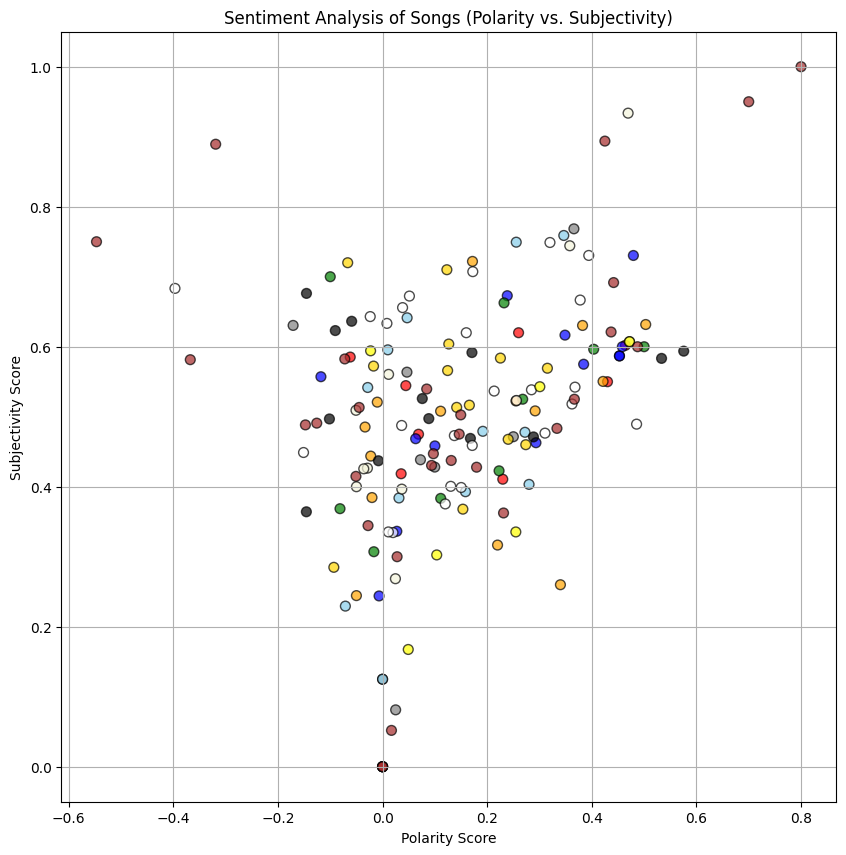

In [32]:
import matplotlib.pyplot as plt
import matplotlib.colors


polarities = df['POLARITY'].tolist()
subjectivities = df['SUBJECTIVITY'].tolist()
song_titles = df['SONG'].tolist()  

album_colors = {'Please Please Me': 'red', 'With The Beatles': 'grey', 
                'A Hard Day\'s Night': 'blue', 'Beatles For Sale': 'green', 'Help!':'skyblue', 
                'Rubber Soul':'orange', 'Revolver':'black', 'Sgt. Pepper\'s Lonely Hearts Club Band':'gold',
                'Magical Mystery Tour':'beige','The Beatles (aka The White Album)':'white', 'Yellow Submarine':'Yellow',
                'Abbey Road':'brown','Let It Be':'brown'
                } 

plt.figure(figsize=(10, 10))

colors = [album_colors.get(album, 'gray') for album in df["ALBUM"]]

plt.figure(figsize=(10,10))  
plt.scatter(polarities, subjectivities, c=colors, alpha=0.7, edgecolors='k', s=50)  

plt.xlabel('Polarity Score')
plt.ylabel('Subjectivity Score')
plt.title('Sentiment Analysis of Songs (Polarity vs. Subjectivity)')

# for i, txt in enumerate(song_titles):
#   if len(txt) > 10: #truncate to n characters
#     trunc = txt[:10] + "..." 
#   else:
#     trunc = txt
#   plt.annotate(trunc, (polarities[i], subjectivities[i]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.grid(True)
# plt.show()

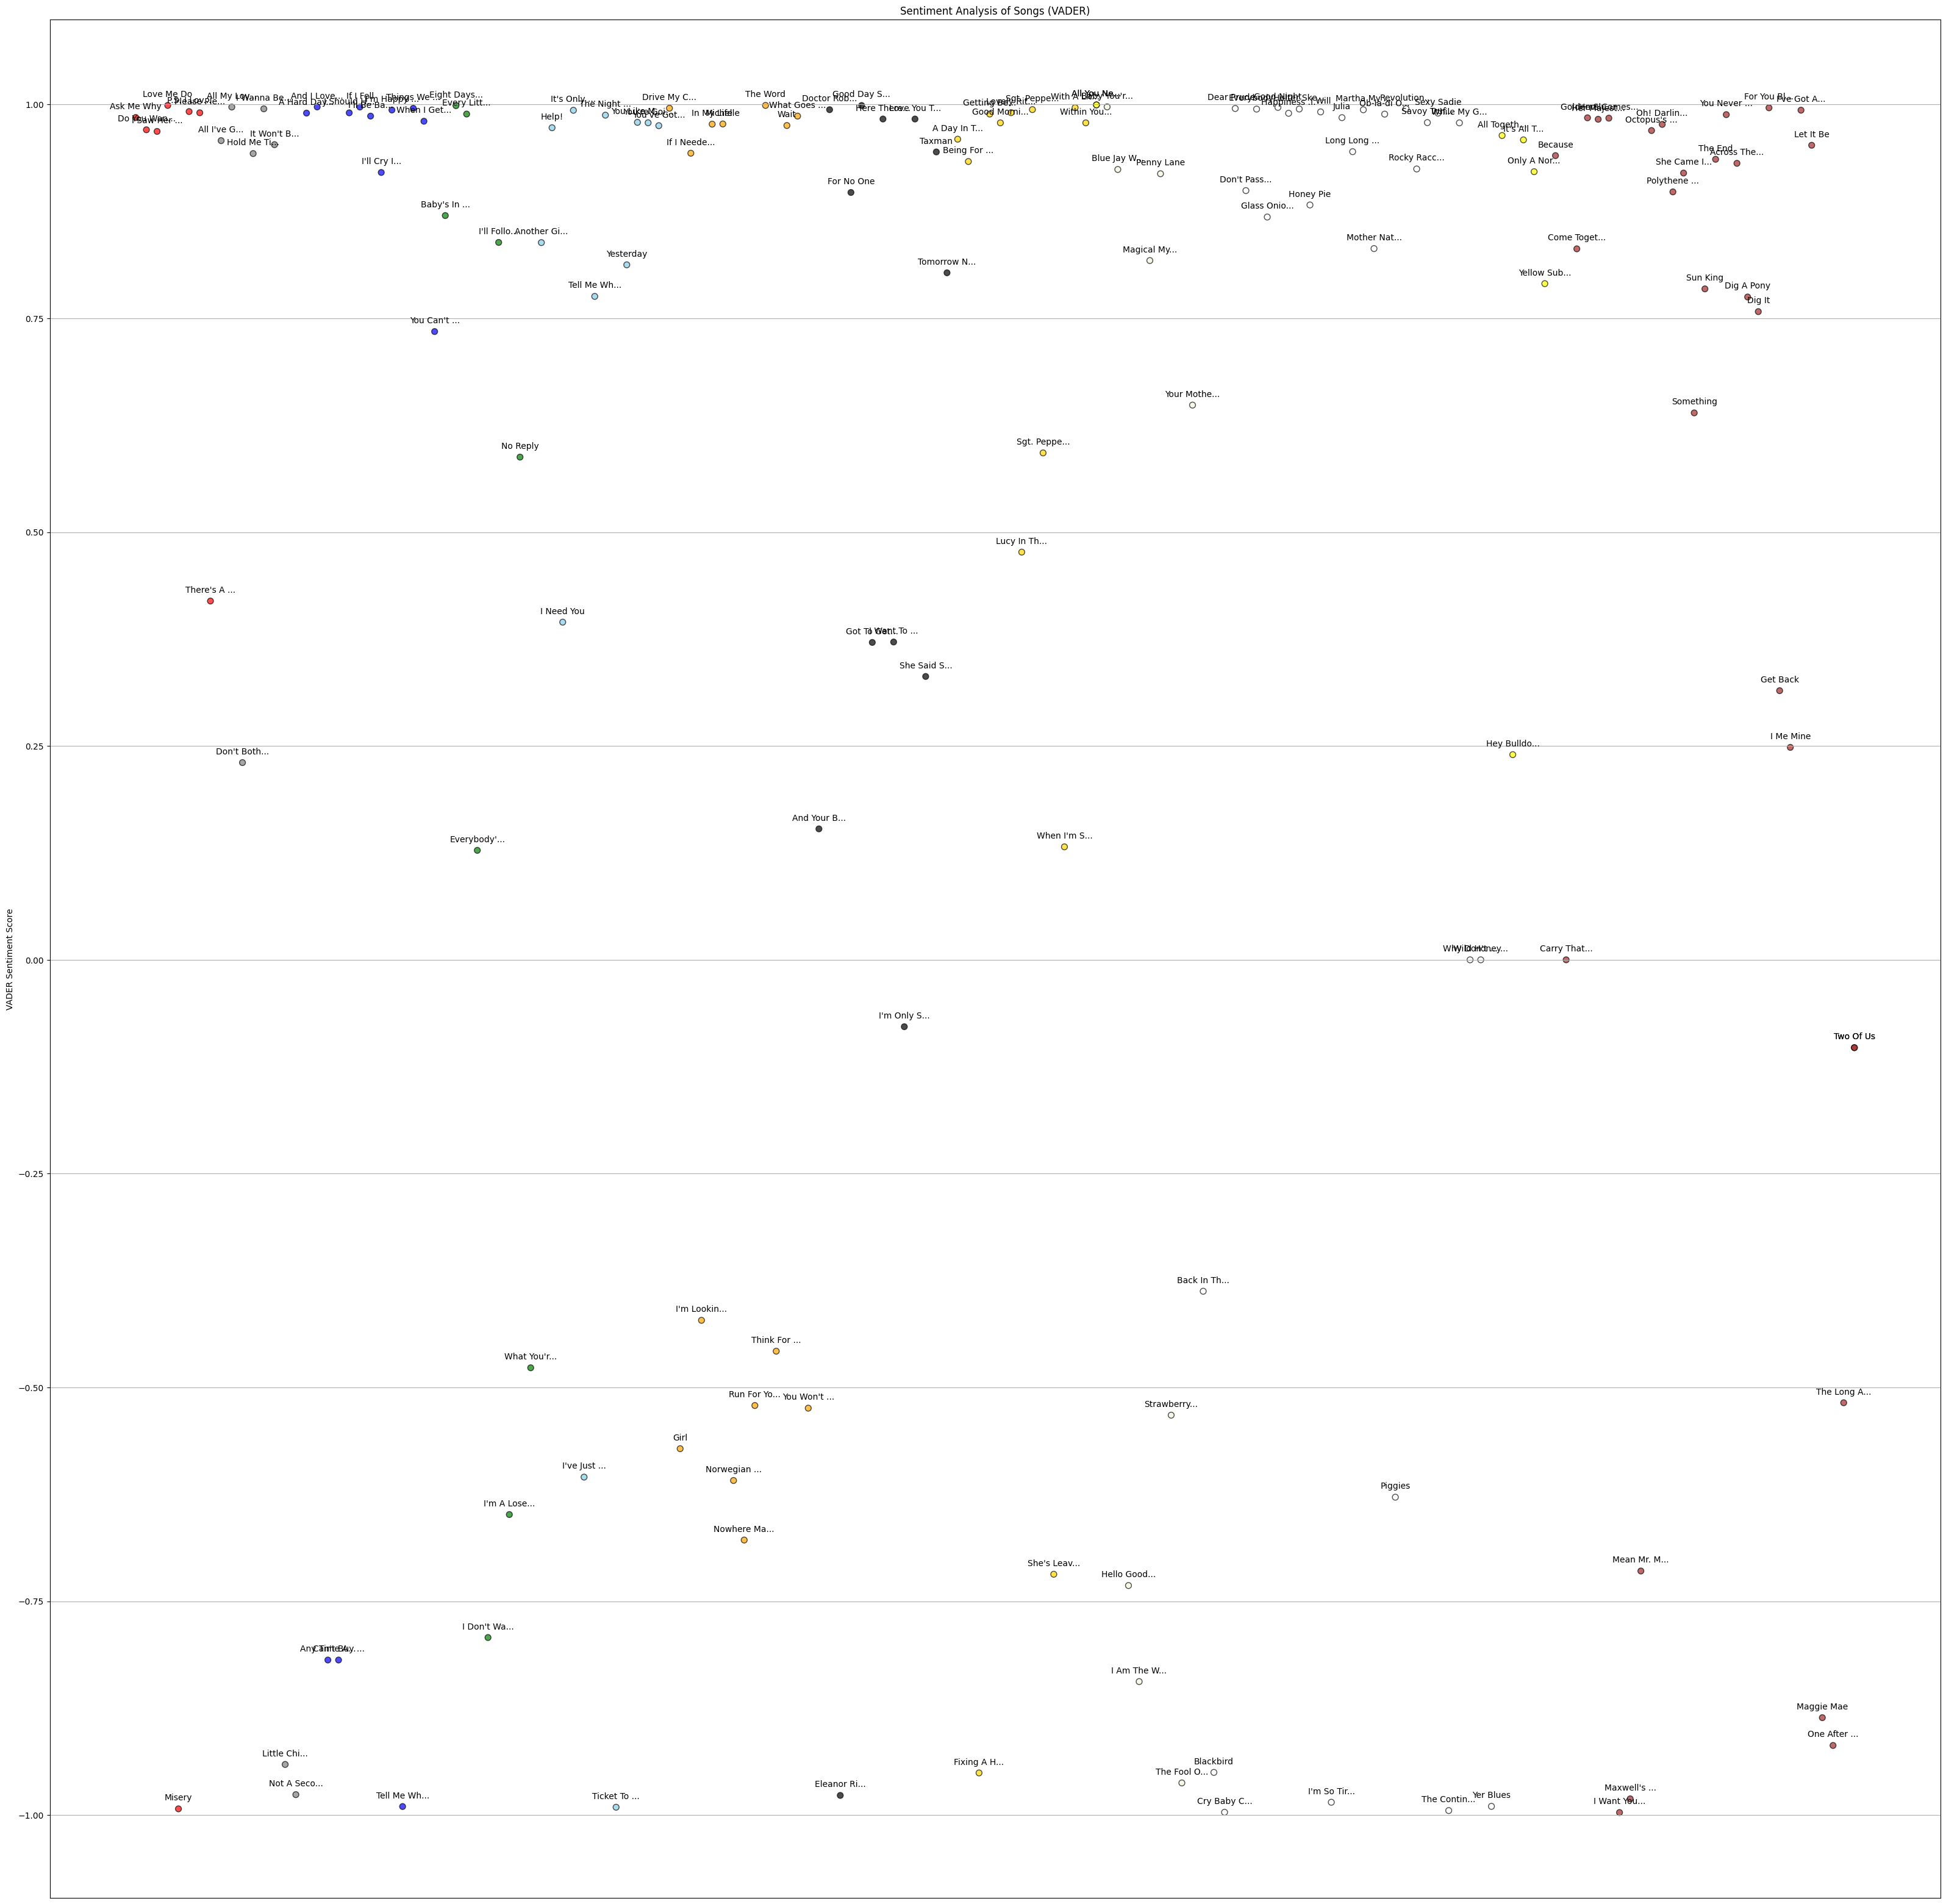

In [33]:
plt.figure(figsize=(40, 40))
plt.scatter(df['SONG'], df['VADER_SENTIMENT'], c=colors, alpha=0.7, edgecolors='k', s=50)  
plt.ylabel('VADER Sentiment Score')
plt.title('Sentiment Analysis of Songs (VADER)')

for i, txt in enumerate(df['SONG']):
  if len(txt) > 10:  #truncate to n characters
    trunc = txt[:10] + "..."  
  else:
    trunc = txt
  plt.annotate(trunc, (df.loc[i, 'SONG'], df.loc[i, 'VADER_SENTIMENT']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xticks([])

plt.grid(True)

plt.savefig('sentiment_songs_vader.png', dpi=300, bbox_inches='tight')

### Plot Sentiment per Album

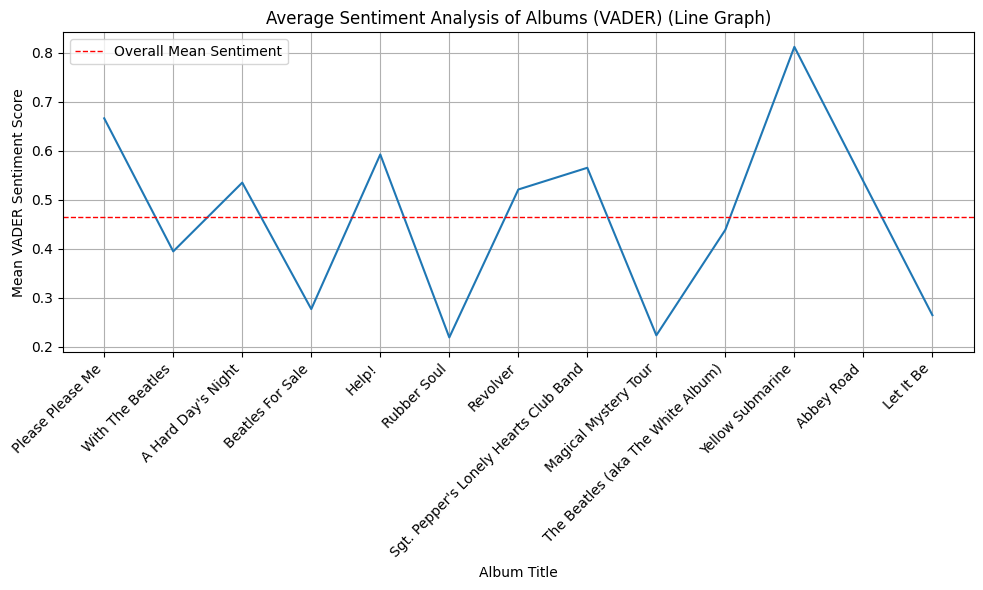

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt

mean_sentiment_by_album = df.groupby('ALBUM', sort=False)['VADER_SENTIMENT'].mean()

plt.figure(figsize=(10, 6))

plt.plot(mean_sentiment_by_album.index, mean_sentiment_by_album.values)

plt.axhline(y=mean_sentiment_by_album.mean(), color='red', linestyle='dashed', linewidth=1, label='Overall Mean Sentiment')

plt.xlabel('Album Title')
plt.ylabel('Mean VADER Sentiment Score')
plt.title('Average Sentiment Analysis of Albums (VADER) (Line Graph)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

plt.show()
plt.savefig('sentiment_albums_vader.png', dpi=300, bbox_inches='tight')

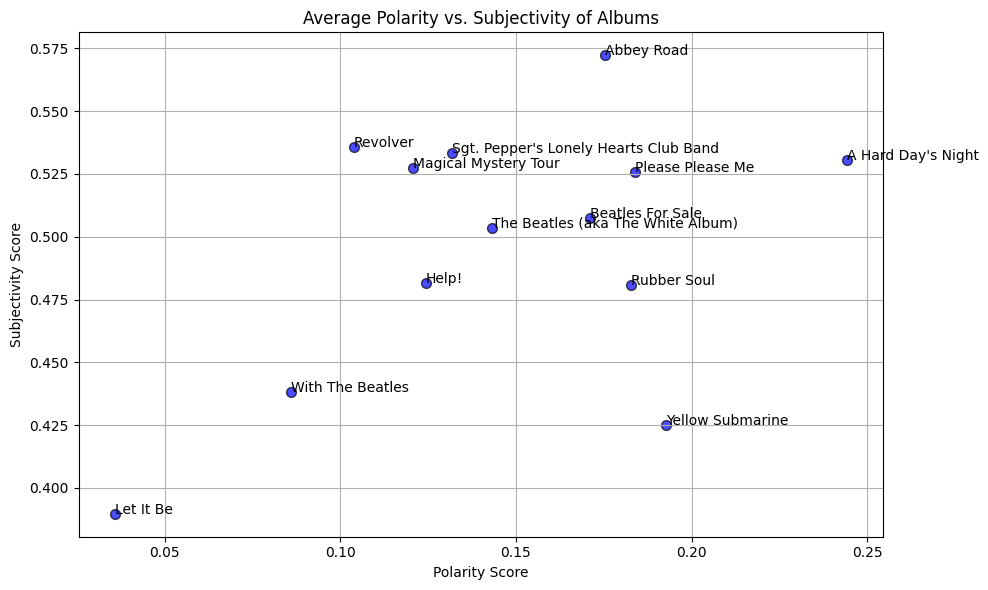

In [35]:
# Calculate mean polarity and subjectivity per album
mean_polarity_by_album = df.groupby('ALBUM')['POLARITY'].mean()
mean_subjectivity_by_album = df.groupby('ALBUM')['SUBJECTIVITY'].mean()

plt.figure(figsize=(10, 6)) 
plt.scatter(mean_polarity_by_album.values, mean_subjectivity_by_album.values, c='blue', alpha=0.7, edgecolors='k', s=50)

for i, (album, _) in enumerate(mean_polarity_by_album.items()):
  plt.annotate(album, (mean_polarity_by_album.iloc[i], mean_subjectivity_by_album.iloc[i]))  

plt.xlabel('Polarity Score')
plt.ylabel('Subjectivity Score')
plt.title('Average Polarity vs. Subjectivity of Albums')
plt.grid(True)
plt.tight_layout()

# plt.show()
plt.savefig('sentiment_albums_polsub.png', dpi=300, bbox_inches='tight')

# Preprocess

In [36]:
from nltk.corpus import stopwords  
stop_words = stopwords.words('english')
stop_words.extend(['i\'ll', 'i\'m', 'i\'ve', 'i\'d',
                   'it\'d', 'it\'s', 'it\'s', 'it\'ll',
                   'oh', 'yeah', '-', 'can\'t',
                   'that\'s', 'that\'d', 'there\'s', 'there\'ll', 'there\'d',
                   'they\'d', 'they\'ll', 'they\'ve', 'they\'re',
                   'we\'re', 'we\'ve', 'we\'ll', 'we\'d',
                   'much', 'really', 'whoa.....', 'oo.', 'yeh',
                   'mm', 'gotta', 'let', 'let\'s',
                   'she\'ll', 'she\'d', 'she\'s',
                   'he\'ll', 'he\'d', 'he\'s',
                   'who\'se', 'who\'s',
                   'an\'', 'ain\'t', 'ii\'ve', 'd\''])

def clean_lyrics(text):
  text = text.lower()
  filtered_words = []
  text = re.sub(r'\(([^)]+)\)|\"([^"]+)\"', r'\1 \2', text)  # parenthesis and double quotes
  for word in text.split():
    if word not in stop_words:
      filtered_words.append(word)

  # Join filtered words back into a string
  text = ' '.join(filtered_words)
 
  # Remove punctuation marks
  text = re.sub(r'[^\w\s]', '', text)
  return text

def lemmatization(text, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    doc = nlp(text)  
    lemmas = [token.lemma_ for token in doc if token.pos_ in allowed_postags]
    return lemmas  


merged_df['LYRICS'] = merged_df['LYRICS'].apply(clean_lyrics)

print("Stop words and punctuations removed:\n",merged_df['LYRICS'].head())  

merged_df['LYRICS'] = merged_df['LYRICS'].apply(lemmatization, allowed_postags=['NOUN', 'ADJ'])
merged_df['LYRICS'] = [ ' '.join(lemmas) for lemmas in merged_df['LYRICS'] ]
print("Lematized:\n",merged_df['LYRICS'].head())  


Stop words and punctuations removed:
 0    love tell things want know true goes show know...
1    never know love you never know care listen wan...
2    well seventeen know mean way looked way beyond...
3    love love know love always true please love wo...
4    world treating bad misery kind guy never used ...
Name: LYRICS, dtype: object
Lematized:
 0    love thing true show blue mine happiness cry t...
1    love care listen secret promise whisper ear wo...
2    know mean way way compare long fall love dance...
3    love love love true love love love love true l...
4    world bad misery guy cry bad misery misery lit...
Name: LYRICS, dtype: object


In [37]:
merged_df['DENSITY'] = merged_df['LYRICS'].str.split().str.len() / merged_df['DURATION']
merged_df['DPM'] = merged_df['DENSITY'] * 60
pd.set_option('display.max_rows', 10)  

merged_df

,ALBUM,SONG,LYRICS,COMPOSER,YEAR,DURATION,DENSITY,DPM
0,Please Please Me,Ask Me Why,love thing true show blue mine happiness cry t...,Lennon,1963,144.0,0.173611,10.416667
1,Please Please Me,Do You Want To Know A Secret,love care listen secret promise whisper ear wo...,Harrison,1963,115.0,0.156522,9.391304
2,Please Please Me,I Saw Her Standing There,know mean way way compare long fall love dance...,McCartney,1963,171.0,0.111111,6.666667
3,Please Please Me,Love Me Do,love love love true love love love love true l...,Lennon/McCartney,1963,139.0,0.151079,9.064748
4,Please Please Me,Misery,world bad misery guy cry bad misery misery lit...,Lennon/McCartney,1963,105.0,0.200000,12.000000
...,...,...,...,...,...,...,...,...
159,Let It Be,Maggie Mae,judge guilty homeward bounder dirty pound week...,Lennon/McCartney,1970,40.0,0.200000,12.000000
160,Let It Be,One After 909,baby honey line move move baby cold ice knee m...,Lennon/McCartney,1970,174.0,0.287356,17.241379
161,Let It Be,The Long And Winding Road,long road door road door wild windy night rain...,McCartney,1970,218.0,0.100917,6.055046
162,Let It Be,Two Of Us,someone way home home memory road postcard let...,Lennon/McCartney,1970,216.0,0.106481,6.388889


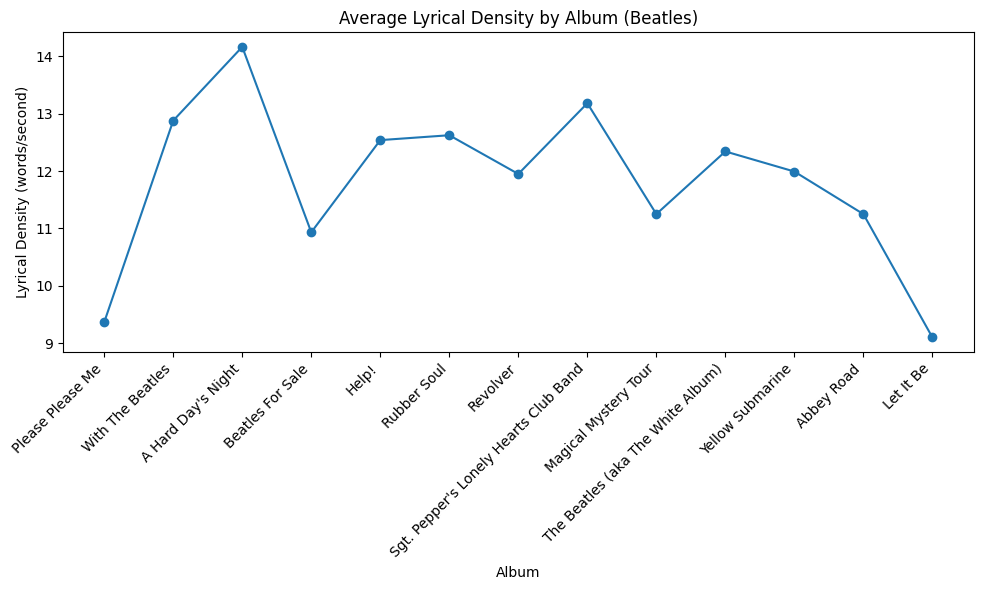

In [38]:
import matplotlib.pyplot as plt
album_densities = merged_df.groupby('ALBUM', sort=False)['DPM'].mean()  # Calculate average density for each album

plt.figure(figsize=(10, 6))
plt.plot(album_densities.index, album_densities.values, marker='o', linestyle='-')  
plt.xlabel('Album')
plt.ylabel('Lyrical Density (words/second)')
plt.title('Average Lyrical Density by Album (Beatles)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


In [39]:
from collections import Counter
import pandas as pd
import gensim
from tqdm import tqdm

# Sample DataFrame
# merged_df = pd.read_csv('path_to_your_csv') 

# Function to calculate unique words in lyrics
def unique_word_count(lyrics):
    """Calculates the number of unique words in a lyrics string."""
    word_counts = Counter(lyrics.split())
    return len(word_counts)  # Get the number of unique words

# Add columns for unique words and density of unique words
merged_df['UNIQUE_WORDS'] = merged_df['LYRICS'].apply(unique_word_count)
merged_df['DENSITY_UNIQUE'] = (merged_df['UNIQUE_WORDS'] / merged_df['DURATION'])*60
pd.set_option('display.max_rows', 10)  # Show all rows

# Create a list of tokenized documents (lyrics)
list_df = merged_df['LYRICS'].str.split()

# Create a gensim dictionary and corpus
dictionary = gensim.corpora.Dictionary(list_df)
corpus = [dictionary.doc2bow(doc) for doc in list_df]

# Check vocabulary (word to id mapping)
print(dictionary.token2id)

# Train the LDA model
num_topics = 5
lda_model = gensim.models.LdaMulticore(corpus=corpus, 
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       passes=10,
                                       random_state=42,
                                       workers=4 
                                       )

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx+1} \nWords: {topic}')

{'believe': 0, 'blue': 1, 'concieve': 2, 'cry': 3, 'happiness': 4, 'love': 5, 'mine': 6, 'misery': 7, 'reason': 8, 'sad': 9, 'show': 10, 'thing': 11, 'time': 12, 'true': 13, 'care': 14, 'ear': 15, 'listen': 16, 'promise': 17, 'secret': 18, 'week': 19, 'whisper': 20, 'word': 21, 'compare': 22, 'crossd': 23, 'dance': 24, 'fall': 25, 'hand': 26, 'heart': 27, 'know': 28, 'long': 29, 'mean': 30, 'night': 31, 'room': 32, 'saw': 33, 'standing': 34, 'way': 35, 'well': 36, 'zoom': 37, 'new': 38, 'bad': 39, 'guy': 40, 'little': 41, 'lonely': 42, 'world': 43, 'day': 44, 'home': 45, 'letter': 46, 'treasure': 47, 'write': 48, 'complain': 49, 'girl': 50, 'hard': 51, 'last': 52, 'rain': 53, 'sound': 54, 'head': 55, 'low': 56, 'mind': 57, 'place': 58, 'round': 59, 'sorrow': 60, 'tomorrow': 61, 'call': 62, 'come': 63, 'kissing': 64, 'phone': 65, 'want': 66, 'close': 67, 'darling': 68, 'dream': 69, 'eye': 70, 'hope': 71, 'lip': 72, 'alone': 73, 'blame': 74, 'bother': 75, 'leave': 76, 'right': 77, 'same'

In [40]:
# Group DataFrame by album
grouped_lyrics = merged_df.groupby('ALBUM', sort=False)['LYRICS']

for album, group_lyrics in grouped_lyrics:
  print(f"Album: {album}")
  for lyric in group_lyrics:
    print(lyric)  
  print("-" * 20) 

Album: Please Please Me
love thing true show blue mine happiness cry time reason sad love concieve misery love love thing true show blue believe concieve misery love love
love care listen secret promise whisper ear word love secret week listen secret promise whisper ear word love
know mean way way compare long fall love dance well heart zoom crossd room hand night love saw standing
love love love true love love love love true love new love love love true love love love love true love
world bad misery guy cry bad misery misery little thing lonely misery guy cry bad misery misery little thing lonely misery
letter love treasure word love home love day write letter love
last night word girl girl way love love sound complain rain heart hard reason love last night word girl girl
place low blue mind time thing round head thing love mind sorrow sad tomorrow place low blue mind time place place
--------------------
Album: With The Beatles
want call phone come home call call ear word kissing cal

In [41]:
# Group DataFrame by album
grouped_lyrics = merged_df.groupby('ALBUM', sort=False)['LYRICS']

album_corpora = []
album_dictionaries = []

# Loop through each album group
album_list = []
for album, lyrics_group in grouped_lyrics:
  # Create a list of tokenized documents for this album
  list_album = lyrics_group.str.split()

  # Create a dictionary and corpus specific to this album
  album_dictionary = gensim.corpora.Dictionary(list_album)
  album_corpus = [album_dictionary.doc2bow(doc) for doc in list_album]

  # Append them to the respective lists
  album_corpora.append(album_corpus)
  album_dictionaries.append(album_dictionary)

  # Train LDA model for this album (inside the loop)
  album_model = gensim.models.LdaMulticore(corpus=album_corpus, 
                                           id2word=album_dictionary,
                                           num_topics=3,
                                           passes=10,
                                           random_state=42)

  album_list.append(album_model)
  print(f"\nAlbum: {album}")
  for idx, topic in album_model.print_topics(-1):
    print(f'Topic: {idx+1} \nWords: {topic}')


Album: Please Please Me
Topic: 1 
Words: 0.071*"place" + 0.055*"mind" + 0.054*"love" + 0.039*"time" + 0.039*"way" + 0.039*"blue" + 0.038*"low" + 0.038*"thing" + 0.022*"sad" + 0.022*"standing"
Topic: 2 
Words: 0.199*"misery" + 0.074*"bad" + 0.069*"thing" + 0.066*"cry" + 0.052*"lonely" + 0.052*"guy" + 0.052*"little" + 0.030*"world" + 0.008*"time" + 0.008*"sad"
Topic: 3 
Words: 0.288*"love" + 0.056*"true" + 0.047*"word" + 0.038*"girl" + 0.030*"secret" + 0.021*"night" + 0.021*"letter" + 0.021*"last" + 0.021*"listen" + 0.021*"ear"

Album: With The Beatles
Topic: 1 
Words: 0.070*"bother" + 0.070*"time" + 0.070*"wondring" + 0.038*"right" + 0.038*"day" + 0.038*"girl" + 0.038*"leave" + 0.038*"line" + 0.038*"cry" + 0.038*"second"
Topic: 2 
Words: 0.334*"man" + 0.080*"babe" + 0.065*"other" + 0.035*"love" + 0.035*"home" + 0.035*"night" + 0.035*"good" + 0.035*"day" + 0.020*"eye" + 0.020*"fun"
Topic: 3 
Words: 0.100*"tonight" + 0.086*"little" + 0.086*"child" + 0.058*"call" + 0.044*"tight" + 0.044*"

In [42]:
import pyLDAvis
import pyLDAvis.gensim

album_title = []
for album, lyrics_group in grouped_lyrics:
    album_title.append(str(album.replace('\\', '')))

album_title
index=0
for album in album_list:
    pyLDAvis.enable_notebook()
    vis=pyLDAvis.gensim.prepare(album_list[index],album_corpora[index],album_dictionaries[index],mds='mmds')
    vis
    pyLDAvis.save_html(vis, 'Bealtes-Lyrics-Outputs/LDA_Album_'+ str(album_title[index]) + '.html')
    index=index+1

c:\Users\joseg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\joseg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\joseg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\joseg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default val

In [43]:
# Create a single corpus and dictionary for all lyrics
all_lyrics = merged_df['LYRICS'].tolist()
list_all_lyrics = [doc.split() for doc in all_lyrics]  # Tokenize documents

# Create a dictionary and corpus for the entire dataset
all_dictionary = gensim.corpora.Dictionary(list_all_lyrics)
all_corpus = [all_dictionary.doc2bow(doc) for doc in list_all_lyrics]

# Train the LDA model with 5 topics and other parameters
general_model = gensim.models.LdaMulticore(corpus=all_corpus, 
                                      id2word=all_dictionary,
                                      num_topics=5,
                                      passes=10,
                                      random_state=12)

# Print topics
print("Overall Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx+1} \nWords: {topic}')


Overall Topics:
Topic: 1 
Words: 0.031*"day" + 0.023*"eye" + 0.022*"way" + 0.021*"home" + 0.020*"good" + 0.019*"love" + 0.018*"life" + 0.017*"time" + 0.015*"dance" + 0.012*"road"
Topic: 2 
Words: 0.210*"love" + 0.021*"money" + 0.021*"true" + 0.019*"lonely" + 0.017*"heart" + 0.014*"time" + 0.013*"song" + 0.012*"pepper" + 0.012*"good" + 0.012*"care"
Topic: 3 
Words: 0.031*"mine" + 0.020*"day" + 0.019*"bad" + 0.018*"mad" + 0.016*"night" + 0.014*"ride" + 0.014*"baby" + 0.013*"ticket" + 0.013*"little" + 0.012*"right"
Topic: 4 
Words: 0.055*"man" + 0.019*"night" + 0.018*"baby" + 0.017*"people" + 0.017*"mind" + 0.015*"tonight" + 0.013*"lonely" + 0.013*"rich" + 0.010*"love" + 0.009*"morning"
Topic: 5 
Words: 0.076*"girl" + 0.023*"word" + 0.023*"time" + 0.022*"mother" + 0.018*"thing" + 0.017*"yellow" + 0.017*"submarine" + 0.017*"lose" + 0.015*"little" + 0.014*"love"


In [44]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(general_model,all_corpus,all_dictionary,mds='mmds')
vis
pyLDAvis.save_html(vis, 'Bealtes-Lyrics-Outputs/LDA_Album_General.html')

c:\Users\joseg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [45]:
# Group DataFrame by composer
grouped_lyrics = merged_df.groupby('COMPOSER')['LYRICS']

composer_corpora = []
composer_dictionaries = []

# Loop through each composer
composer_list = []
for composer, lyrics_group in grouped_lyrics:
  # Create a list of tokenized documents for this composer
  list_composer = lyrics_group.str.split()

  # Create a dictionary and corpus specific to this composer
  composer_dictionary = gensim.corpora.Dictionary(list_composer)
  composer_corpus = [composer_dictionary.doc2bow(doc) for doc in list_composer]

  composer_corpora.append(composer_corpus)
  composer_dictionaries.append(composer_dictionary)

  # Train LDA model for this composer (inside the loop)
  composer_model = gensim.models.LdaMulticore(corpus=composer_corpus, 
                                           id2word=composer_dictionary,
                                           num_topics=3,
                                           passes=10,
                                           random_state=42)

  composer_list.append(composer_model)
  print(f"\ncomposer: {composer}")
  for idx, topic in composer_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}')


composer: Harrison
Topic: 0 
Words: 0.115*"mine" + 0.036*"day" + 0.036*"piggy" + 0.026*"night" + 0.021*"time" + 0.016*"song" + 0.016*"little" + 0.016*"everyone" + 0.016*"chord" + 0.016*"matter"
Topic: 1 
Words: 0.108*"love" + 0.052*"dance" + 0.039*"time" + 0.033*"happy" + 0.029*"day" + 0.021*"world" + 0.017*"life" + 0.017*"bother" + 0.013*"wall" + 0.013*"people"
Topic: 2 
Words: 0.038*"time" + 0.028*"girl" + 0.026*"mind" + 0.025*"thing" + 0.022*"guitar" + 0.022*"cause" + 0.022*"darling" + 0.022*"know" + 0.021*"eye" + 0.021*"love"

composer: Lennon
Topic: 0 
Words: 0.109*"love" + 0.039*"girl" + 0.027*"lose" + 0.020*"world" + 0.015*"bad" + 0.015*"need" + 0.015*"mad" + 0.014*"nothing" + 0.013*"gun" + 0.012*"doctor"
Topic: 1 
Words: 0.037*"thing" + 0.034*"love" + 0.020*"mind" + 0.018*"time" + 0.016*"money" + 0.015*"dead" + 0.015*"lot" + 0.013*"easy" + 0.013*"bill" + 0.013*"reason"
Topic: 2 
Words: 0.045*"girl" + 0.031*"man" + 0.021*"little" + 0.019*"baby" + 0.019*"cry" + 0.016*"old" + 0.0

In [46]:
composer_title = []
for composer, lyrics_group in grouped_lyrics:
    composer_title.append(str(composer.replace('/', '')))

index=0
for composer in composer_list:
    pyLDAvis.enable_notebook()
    vis=pyLDAvis.gensim.prepare(composer_list[index],composer_corpora[index],composer_dictionaries[index],mds='mmds')
    vis
    pyLDAvis.save_html(vis, 'Bealtes-Lyrics-Outputs/LDA_Composer_'+ str(composer_title[index]) + '.html')
    index=index+1

c:\Users\joseg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\joseg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\joseg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\joseg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default val

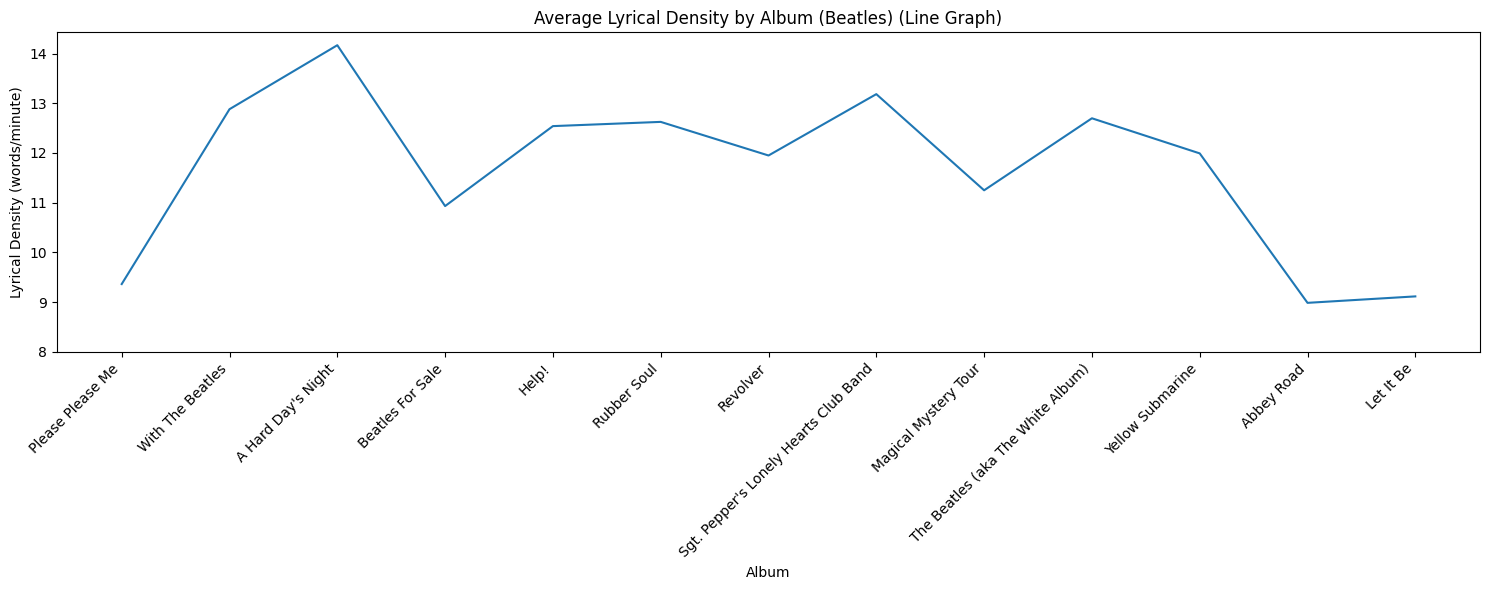

In [56]:
import matplotlib.pyplot as plt

# Group data by album and calculate average lyrical density
album_densities = merged_df.groupby('ALBUM', sort=False)['DPM'].mean()

plt.figure(figsize=(15, 6)) 

plt.plot(album_densities.index, album_densities.values)


plt.ylim(bottom=8)  

plt.xlabel('Album')
plt.ylabel('Lyrical Density (words/minute)')  
plt.title('Average Lyrical Density by Album (Beatles) (Line Graph)') 
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 

plt.show() 


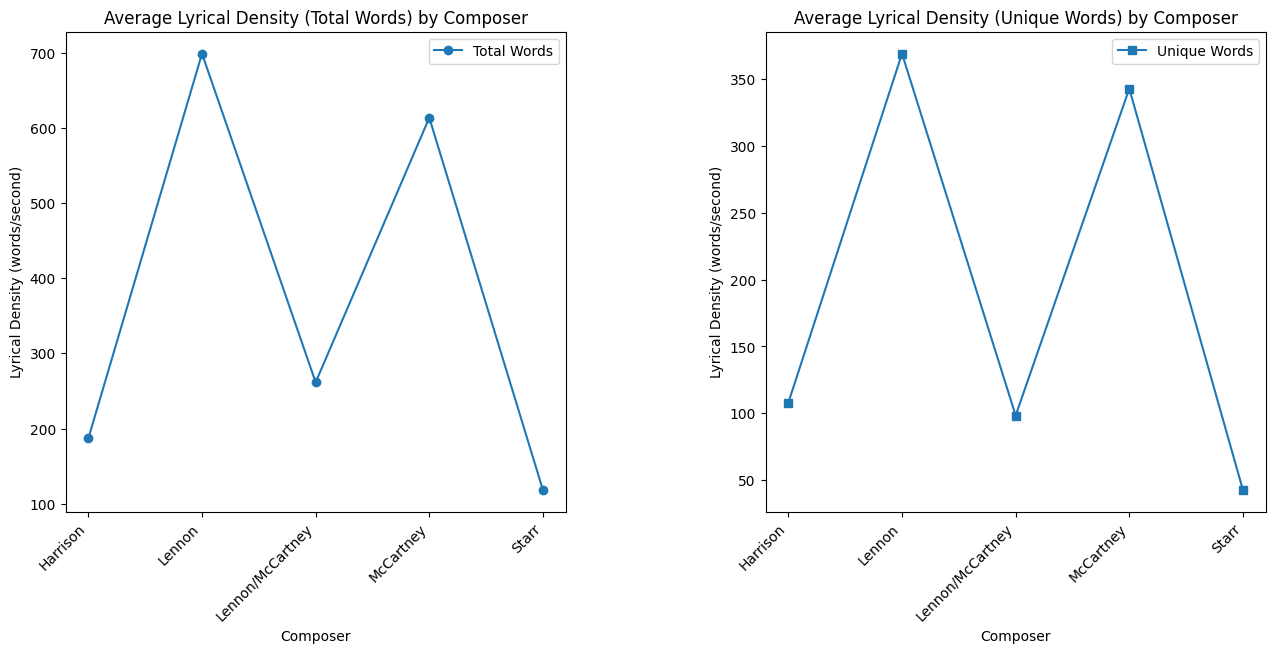

In [48]:
import matplotlib.pyplot as plt

# Group data by composer for both calculations
composer_densities_dpm = merged_df.groupby('COMPOSER')['DPM'].sum()  
composer_densities_unique = merged_df.groupby('COMPOSER')['DENSITY_UNIQUE'].sum()  

fig, axes = plt.subplots(1, 2, figsize=(15, 6))  

# Plot total lyrical density (words/second) on the first subplot
axes[0].plot(composer_densities_dpm.index, composer_densities_dpm.values, marker='o', linestyle='-', label='Total Words')
axes[0].set_xlabel('Composer')
axes[0].set_ylabel('Lyrical Density (words/second)')
axes[0].set_title('Average Lyrical Density (Total Words) by Composer')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')  

# Plot unique lyrical density (words/second) on the second subplot
axes[1].plot(composer_densities_unique.index, composer_densities_unique.values, marker='s', linestyle='-', label='Unique Words')
axes[1].set_xlabel('Composer')
axes[1].set_ylabel('Lyrical Density (words/second)')
axes[1].set_title('Average Lyrical Density (Unique Words) by Composer')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')  


axes[0].legend()
axes[1].legend()


plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4)  

plt.show()

In [49]:
# Convert 'LYRICS' column to numeric by counting the number of words
merged_df['LYRICS'] = merged_df['LYRICS'].str.split().str.len()

# Calculate total words and duration for each album
album_totals = merged_df.groupby('ALBUM', sort=False)[['UNIQUE_WORDS', 'DURATION']].sum()

# Calculate normalized lyrical density (words per second) for each album
album_totals['NORMALIZED_DENSITY'] = album_totals['UNIQUE_WORDS'] / album_totals['DURATION']

album_totals.reset_index(inplace=True)

merged_df = merged_df.merge(album_totals[['ALBUM', 'NORMALIZED_DENSITY']], on='ALBUM')

merged_df


,ALBUM,SONG,LYRICS,COMPOSER,YEAR,DURATION,DENSITY,DPM,UNIQUE_WORDS,DENSITY_UNIQUE,NORMALIZED_DENSITY
0,Please Please Me,Ask Me Why,25,Lennon,1963,144.0,0.173611,10.416667,14,5.833333,0.080392
1,Please Please Me,Do You Want To Know A Secret,18,Harrison,1963,115.0,0.156522,9.391304,9,4.695652,0.080392
2,Please Please Me,I Saw Her Standing There,19,McCartney,1963,171.0,0.111111,6.666667,17,5.964912,0.080392
3,Please Please Me,Love Me Do,21,Lennon/McCartney,1963,139.0,0.151079,9.064748,3,1.294964,0.080392
4,Please Please Me,Misery,21,Lennon/McCartney,1963,105.0,0.200000,12.000000,8,4.571429,0.080392
...,...,...,...,...,...,...,...,...,...,...,...
159,Let It Be,Maggie Mae,8,Lennon/McCartney,1970,40.0,0.200000,12.000000,8,12.000000,0.076559
160,Let It Be,One After 909,50,Lennon/McCartney,1970,174.0,0.287356,17.241379,16,5.517241,0.076559
161,Let It Be,The Long And Winding Road,22,McCartney,1970,218.0,0.100917,6.055046,15,4.128440,0.076559
162,Let It Be,Two Of Us,23,Lennon/McCartney,1970,216.0,0.106481,6.388889,14,3.888889,0.076559


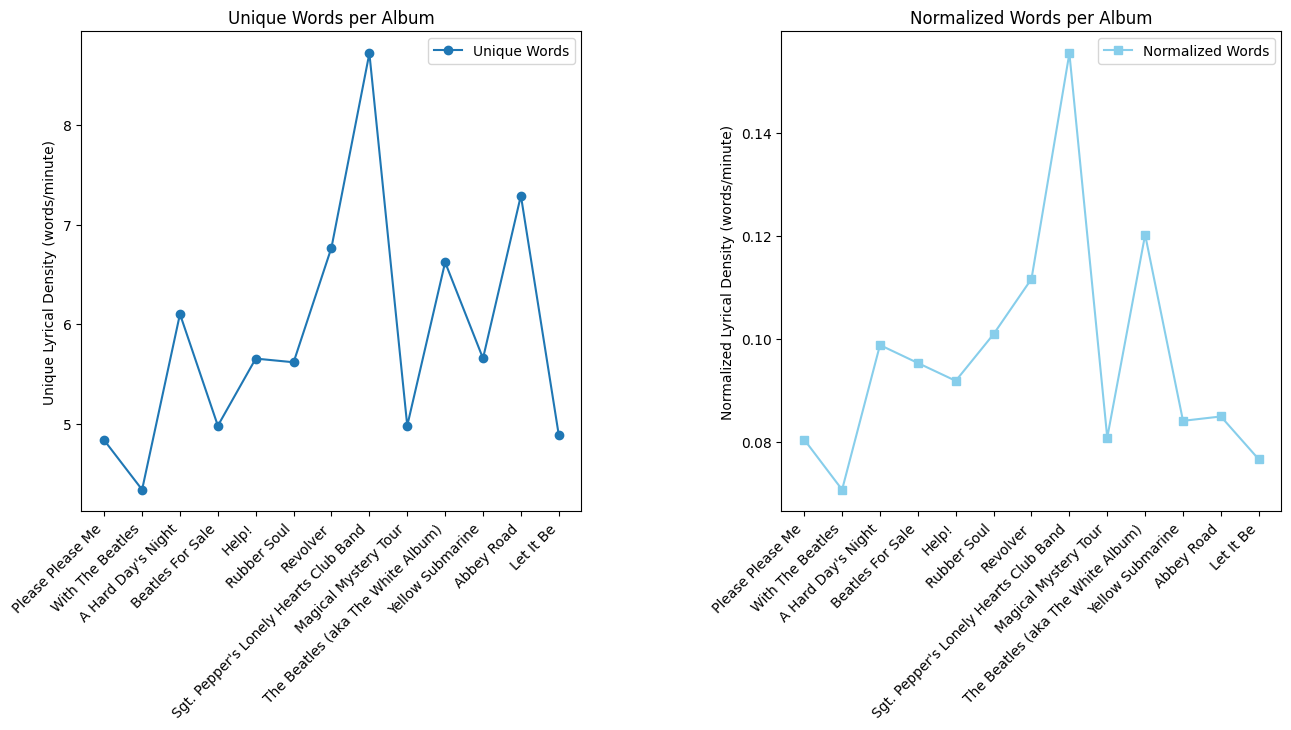

In [50]:
import matplotlib.pyplot as plt

# Group data by album for both calculations
album_densities = merged_df.groupby('ALBUM', sort=False)['DENSITY_UNIQUE'].mean()  # Unique words/minute
album_mean_density = album_totals.groupby('ALBUM', sort=False)['NORMALIZED_DENSITY'].mean()  # Normalized words/minute

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

# Plot average lyrical density (unique words/minute) on the first subplot
axes[0].plot(album_densities.index, album_densities.values, marker='o', linestyle='-', label='Unique Words')
axes[0].set_ylabel('Unique Lyrical Density (words/minute)')
axes[0].set_title('Unique Words per Album')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')  
# Plot normalized lyrical density (normalized words/minute) on the second subplot
axes[1].plot(album_mean_density.index, album_mean_density.values, marker='s', linestyle='-', color='skyblue', label='Normalized Words')
axes[1].set_ylabel('Normalized Lyrical Density (words/minute)')
axes[1].set_title('Normalized Words per Album')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')  


axes[0].legend()
axes[1].legend()


plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4)  

plt.show()


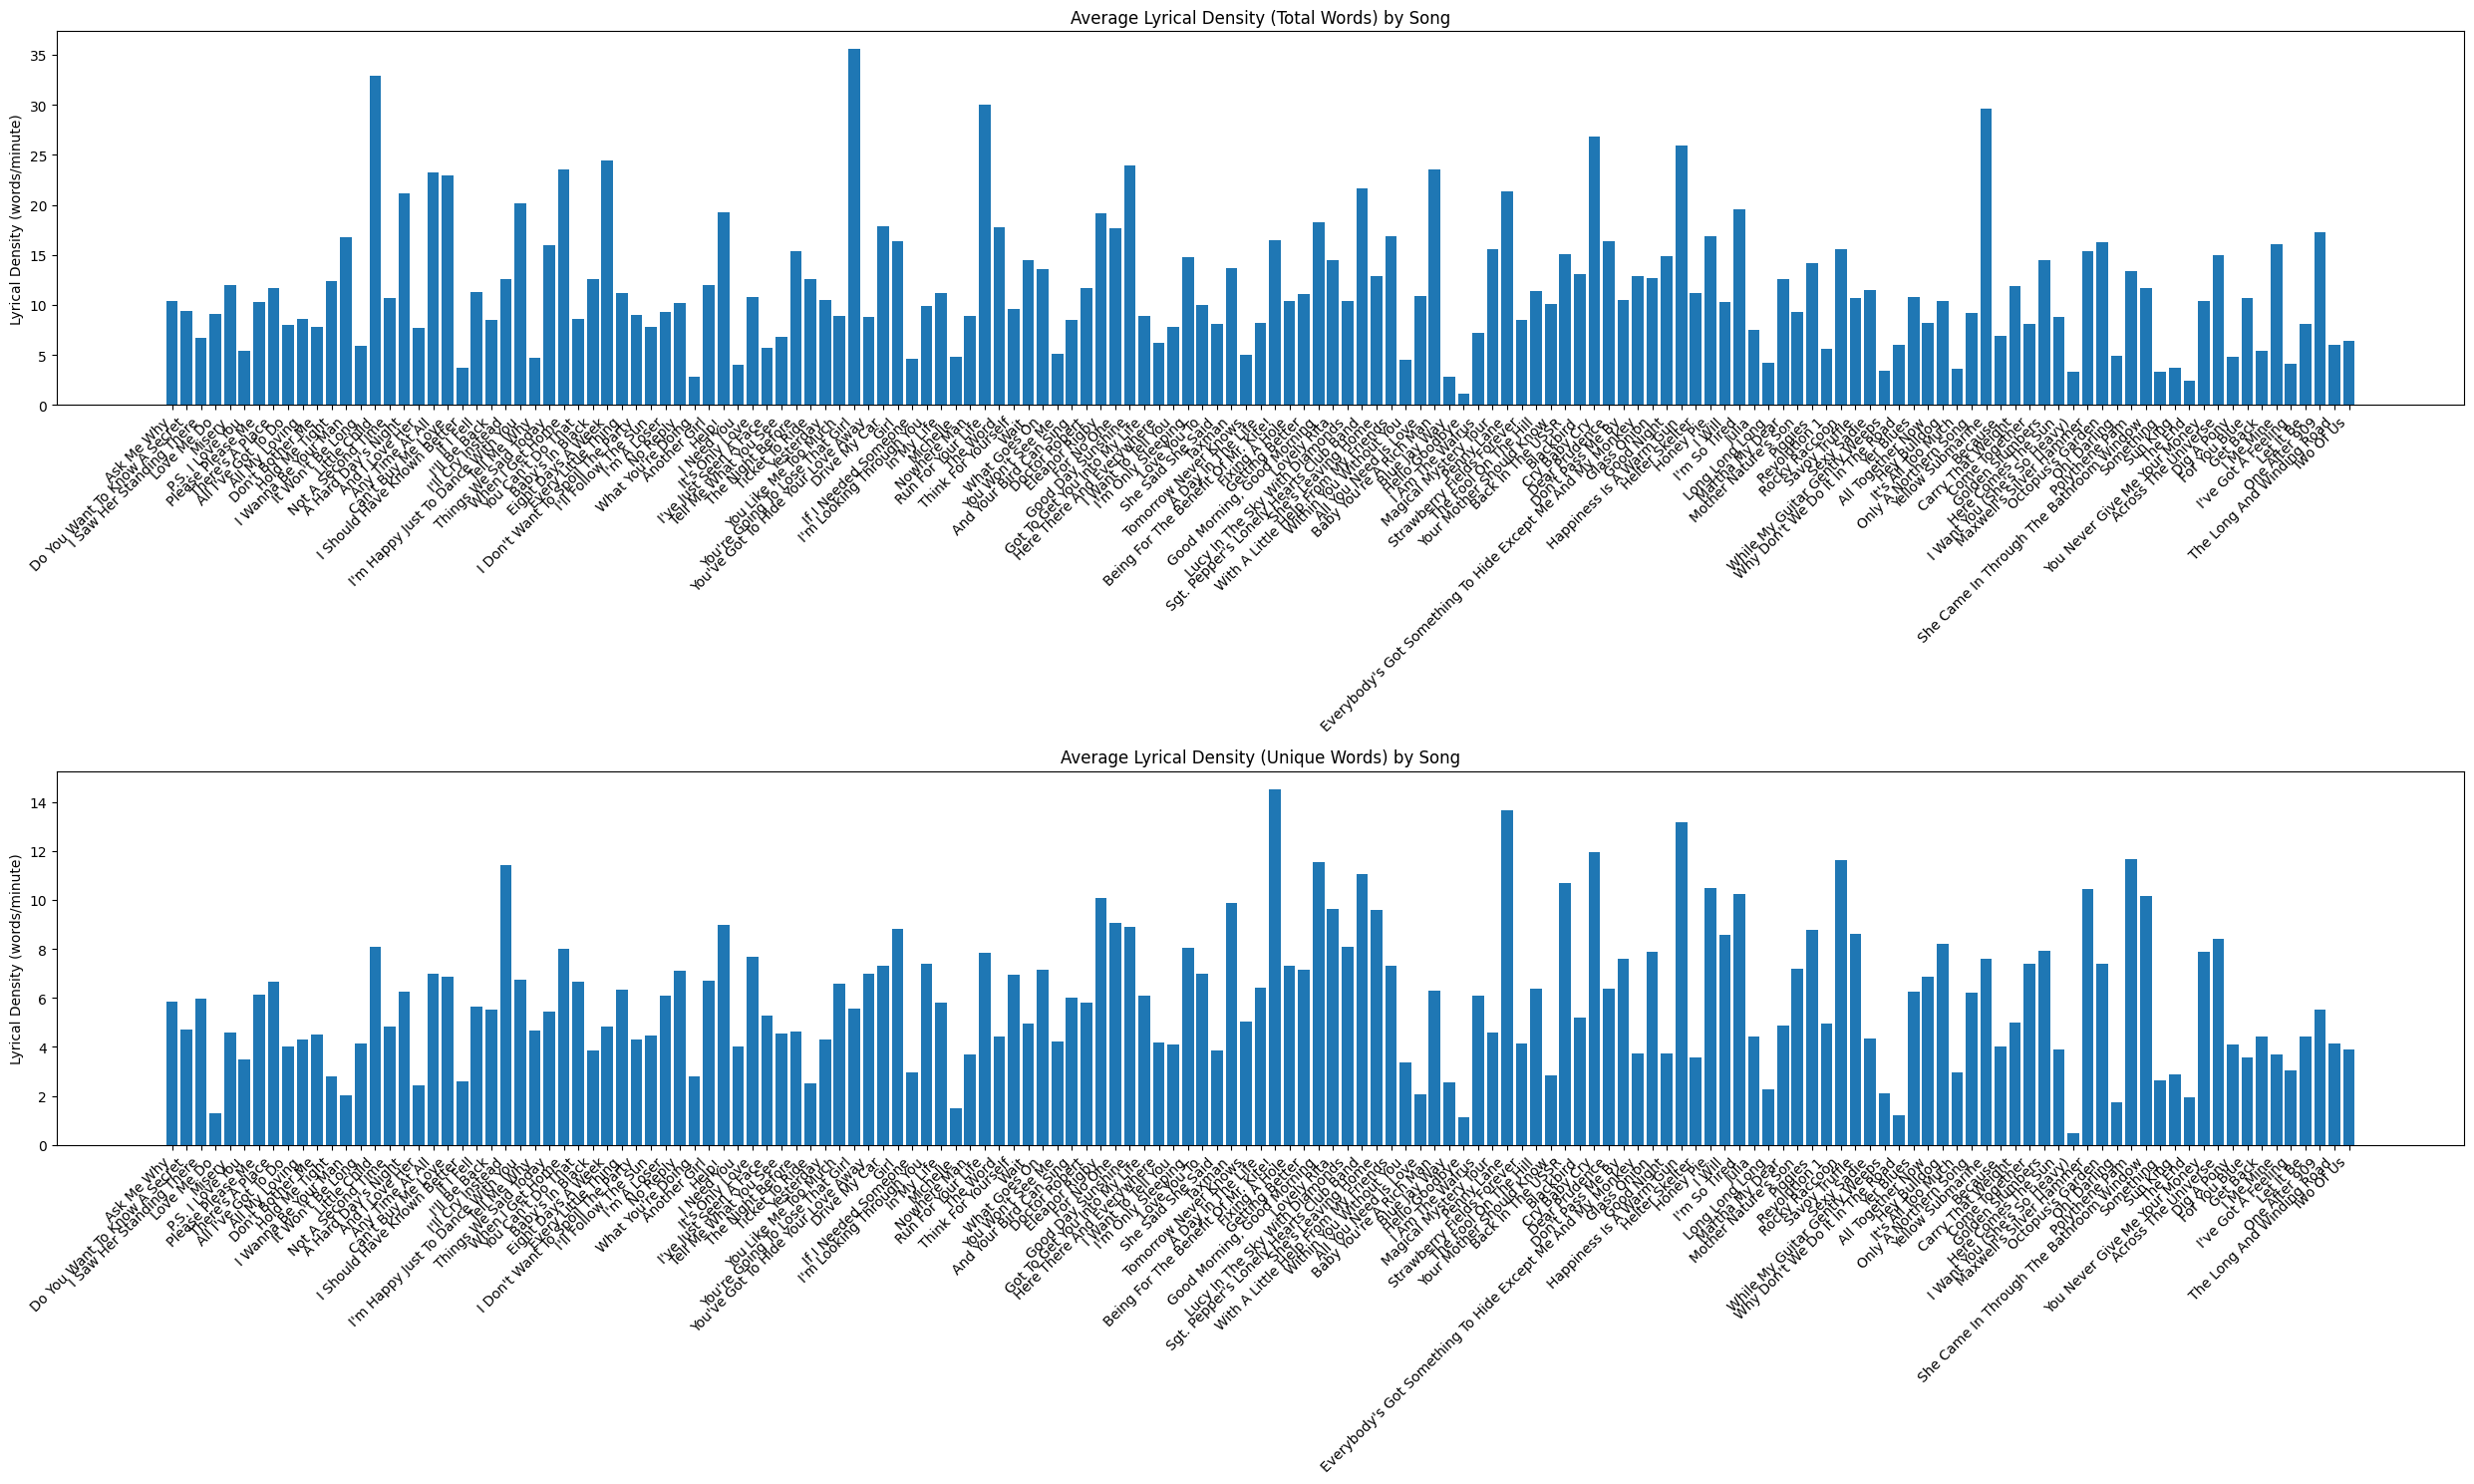

In [51]:
import matplotlib.pyplot as plt

merged_df = merged_df[merged_df['DURATION'] >= 70]

# Group data by song for both calculations (assuming 'SONG' column exists)
song_densities_dpm = merged_df.groupby('SONG', sort=False)['DPM'].mean()  # Total words (DPM)
song_densities_unique = merged_df.groupby('SONG', sort=False)['DENSITY_UNIQUE'].mean()  # Unique words

plt.figure(figsize=(25, 15))

# Truncate song titles 
max_title_length = 30

def truncate_title(title):
    if len(title) > max_title_length:
        return title[:max_title_length] + "..."  # Truncate and add ellipsis
    else:
        return title

song_densities_dpm.index = song_densities_dpm.index.to_series().apply(truncate_title).to_frame().index
song_densities_unique.index = song_densities_unique.index.to_series().apply(truncate_title).to_frame().index


# Plot average lyrical density (total words) on the first subplot
plt.subplot(2, 1, 1)  
plt.bar(song_densities_dpm.index, song_densities_dpm.values)
plt.ylabel('Lyrical Density (words/minute)') 
plt.title('Average Lyrical Density (Total Words) by Song')
plt.xticks(rotation=45, ha='right')  

# Plot average lyrical density (unique words) on the second subplot
plt.subplot(2, 1, 2) 
plt.bar(song_densities_unique.index, song_densities_unique.values)
plt.ylabel('Lyrical Density (words/minute)') 
plt.title('Average Lyrical Density (Unique Words) by Song')
plt.xticks(rotation=45, ha='right')  

plt.subplots_adjust(hspace=1)

plt.tight_layout()

plt.show()
